# Biblioteka NumPy

NumPy to jedna z podstawowych bibliotek umożliwiających przeprowadzanie zaawansowanych obliczeń matematycznych w Pythonie, na przykład do zastosowań naukowych. W szczególności została stworzona, aby umożliwić szybkie i sprawne przeprowadzanie obliczeń numerycznych, np. mnożenie i dodawanie macierzy, ich diagonalizacja czy odwracanie. Zawiera bardzo wiele sprawdzonych implementacji operacji na macierzach. W nomenklaturze NumPy wektory, macierze i wielowymiarowe struktury to tablice (ang. *array*). Szacuje się, że operacje na tablicach NumPy są ok. 50-krotnie szybsze od operacji na standardowych listach/tablicach w Pythonie (zaobserwujemy to na przykładzie w trakcie dzisiejszych zajęć). Nazwa NumPy pochodzi od "Numerical Python".

Dokumentacja biblioteki NumPy jest dostępna pod adresem https://numpy.org/doc/.

## Instalacja oraz import biblioteki NumPy

Instalujemy za pomocą komendy pip:

In [1]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


oraz importujemy za pomocą instrukcji

In [3]:
import numpy as np

## Podstawowy typ danych - numpy.ndarray

Podstawowym typem danych biblioteki NumPy jest [np.ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html) (od ang. *n-dimensional array*), czyli tablica wielowymiarowa.

### Tworzenie tablicy w NumPy

Tablica [numpy.ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html) może być tworzona na różne sposoby:
- z list albo krotek za pomocą funkcji [np.array()](https://numpy.org/doc/stable/reference/generated/numpy.array.html),
- przy pomocy funkcji generujących, np. [np.arange()](https://numpy.org/doc/stable/reference/generated/numpy.arange.html), [np.linspace()](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html),
- wczytując dane z plików.

Na przykładach zobaczymy jak tworzyć tablice typu `numpy.ndarray`.

#### Tworzenie tablicy 1-wymiarowej (wektora)

In [4]:
v = np.array([4,5,7,9,13])
v

array([ 4,  5,  7,  9, 13])

**Uwaga:** Poniższa próba utworzenia tablicy nie zadziała:

In [5]:
N = np.array(1, 2, 3, 4)

TypeError: array() takes from 1 to 2 positional arguments but 4 were given

Zobaczmy, że rzeczywiście utworzyliśmy zmienną typu `np.ndarray`:

In [6]:
print(type(v))

<class 'numpy.ndarray'>


O takiej tablicy możemy myśleć jako o wektorze

\begin{align}
    v &= \begin{bmatrix}
           4 \\
           5 \\
           7 \\
           9 \\
           13
         \end{bmatrix}
  \end{align} 

Tworzenie za pomocą funkcji [np.arange()](https://numpy.org/doc/stable/reference/generated/numpy.arange.html), gdzie kolejne parametry pozwalają określić zakres liczb wraz z odstępem liczbowym:

In [7]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [8]:
np.arange(start=15, stop=30, step=2)

array([15, 17, 19, 21, 23, 25, 27, 29])

Możemy też określić docelowy typ elementów:

In [9]:
np.array([4, 3, 2], dtype=np.float32)

array([4., 3., 2.], dtype=float32)

**Uwaga:** Jak zwykle w Pythonie, prawy zakres jest otwarty z prawej strony:

In [10]:
np.arange(start=15, stop=29, step=2)

array([15, 17, 19, 21, 23, 25, 27])

In [11]:
np.arange(start=29, stop=15, step=-2)

array([29, 27, 25, 23, 21, 19, 17])

I jeszcze tworzenie tablicy za pomocą funkcji [np.linspace()](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html), gdzie kolejne parametry pozwalają określić końce zakresu liczbowego oraz liczbę elementów w wynikowej tablicy (parametr num). 

**Uwaga:** W tym przypadku zakres jest domknięty z lewej ale i z prawej strony! Wynikowa tablica będzie zawierała lewy i prawy koniec zakresu oraz num-2 liczb równo rozmieszczonych pomiędzy krańcami zakresu.

In [12]:
np.linspace(start=0, stop=10, num=6)

array([ 0.,  2.,  4.,  6.,  8., 10.])

Korzystając z funkcji [np.zeros](https://numpy.org/doc/stable/reference/generated/numpy.zeros.html) możemy w prosty sposób utworzyć tablicę jednowymiarową zainicjalizowaną zerami o podanej liczbie elementów.

In [13]:
np.zeros(5)

array([0., 0., 0., 0., 0.])

Zera niekoniecznie muszą oznaczać liczbę 0. Zero jest pojmowane ogólnie, zależnie od typu elementów tablicy: 

In [14]:
np.zeros(4, dtype='str')

array(['', '', '', ''], dtype='<U1')

In [15]:
np.zeros(4, dtype='bool')

array([False, False, False, False])

Istnieje też funkcja [np.ones](https://numpy.org/doc/stable/reference/generated/numpy.ones.html), która pozwala tworzyć tablice zainicjalizowane jedynkami:

In [16]:
np.ones(5)

array([1., 1., 1., 1., 1.])

In [17]:
np.ones(5, dtype='str')

array(['1', '1', '1', '1', '1'], dtype='<U1')

##### Różnice pomiędzy standardowymi listami w Pythonie a tablicami np.ndarray są następujące.

Listy mogą zawierać elementy różnych typów:

In [18]:
[1, 3.4, 'Ala', ['ma', 'kota']]

[1, 3.4, 'Ala', ['ma', 'kota']]

Elementy `np.ndarray` muszą być tego samego typu. Jeżeli nie są, funkcja `np.array` automatycznie "uzgodni" typy:

In [19]:
np.array([1,'ala',3])

array(['1', 'ala', '3'], dtype='<U11')

In [20]:
np.array((1.2, True, 5))

array([1.2, 1. , 5. ])

Na tablicach możemy przeprowadzać typowe operacje matematyczne na poszczególnych elementach tablicy, tj. element po elemencie, przy użyciu jednego operatora lub funkcji bez pisania jakichkolwiek pętli (ang. *element-wise operations*):

In [21]:
v/3

array([1.33333333, 1.66666667, 2.33333333, 3.        , 4.33333333])

In [22]:
np.sin(v)

array([-0.7568025 , -0.95892427,  0.6569866 ,  0.41211849,  0.42016704])

Nie mamy takiej możliwości w przypadku standardowych list w Pythonie:

In [23]:
[4,5,7,9,13]/3

TypeError: unsupported operand type(s) for /: 'list' and 'int'

Dla list musimy użyć pętli, na przykład

In [24]:
[x/3 for x in [4,5,7,9,13]]

[1.3333333333333333,
 1.6666666666666667,
 2.3333333333333335,
 3.0,
 4.333333333333333]

Inne różnice są związane w wymaganiami pamięciowymi. 
 - Po pierwsze, ze względu na konieczność przechowywania informacji o typie poszczególnych elementów, listy zajmują więcej miejsca w pamięci. 
 - Po drugie, elementy listy nie muszą być przechowywane w sposób ciągły w pamięci w odróżnieniu od elementów tablic `np.ndarray`.

#### Tworzenie tablicy wielowymiarowej

Tablicę wielowymiarową (np. reprezentującą macierz) możemy utworzyć za pomocą funkcji `np.array` z argumentem będącym zagnieżdżoną listą, tzn. listą, której elementami są inne listy:

In [25]:
M = np.array([[1,2.0,3],[4,5,6]])
M

array([[1., 2., 3.],
       [4., 5., 6.]])

Zwróćmy uwagę jakiego typu są elementy tablicy M w powyższym przykładzie.

Jeszcze jeden przykład:

In [26]:
np.array([[1, 2], [3, 4]], dtype=complex)

array([[1.+0.j, 2.+0.j],
       [3.+0.j, 4.+0.j]])

Spróbujmy utworzyć tablicę 3-wymiarową:

In [27]:
M3D = np.array([[[1,2.0,3],[-8,-4,-2]],[[4,5,6],[9,-2,1.0]]])
print(M3D)

[[[ 1.  2.  3.]
  [-8. -4. -2.]]

 [[ 4.  5.  6.]
  [ 9. -2.  1.]]]


Oczywiście musimy zwrócić uwagę na zgodność liczby elementów dla poszczególnych wymiarów. W przeciwnym przypadku wynik tworzenia tablicy może być nieco zaskakujący, np. w NumPy w wersji 1.23.5 wynikiem będzie 

array([[list([1, 2.0]), list([-8, -4, -2])],[list([4, 5, 6]), list([9, -2, 1.0])]], dtype=object)),

lub po prostu pojawi się komunikat o błędzie (w nowszych wersjach NumPy):

In [28]:
print(f"NumPy version: {np.version.version}")
np.array([[[1,2.0],[-8,-4,-2]],[[4,5,6],[9,-2,1.0]]])

NumPy version: 1.26.3


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (2, 2) + inhomogeneous part.

### Atrybuty obiektów NumPy ndarray

[ndarray.ndim](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.ndim.html): zwraca liczbę całkowitą dodatnią określającą liczbę wymiarów tablicy. 

Uwaga: W terminologii NumPy wymiary określa się mianem "osi" (ang. *axes*). Mówimy, że tablica 2-wymiarowa ma dwie osie. Wymiar odpwiadający wierszom macierzy to oś 0 zaś kolumnom to oś 1. 

In [29]:
print(f"Liczba wymiarów tablicy v: {v.ndim}")
print(f"Liczba wymiarów tablicy M: {M.ndim}")
print(f"Liczba wymiarów tablicy M3D: {M3D.ndim}")

Liczba wymiarów tablicy v: 1
Liczba wymiarów tablicy M: 2
Liczba wymiarów tablicy M3D: 3


Kształt tablicy NumPy opisuje krotka liczb całkowitych dodatnich, określająca zakres wartości indeksów dla poszczególnych wymiarów (osi). Krotka ta dana jest przez atrybut [ndarray.shape](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.shape.html):

In [30]:
print(v.shape)
print(M.shape)
print(M3D.shape)

(5,)
(2, 3)
(2, 2, 3)


Korzystając z możliwości określania kszałtu tablicy, możemy tworzyć tablice o zadanym kszatłcie w jeszcze jeden sposób:

In [31]:
np.zeros((2,4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [32]:
np.ones((3,2,4)) * 4

array([[[4., 4., 4., 4.],
        [4., 4., 4., 4.]],

       [[4., 4., 4., 4.],
        [4., 4., 4., 4.]],

       [[4., 4., 4., 4.],
        [4., 4., 4., 4.]]])

Możemy też utworzyć tablicę o zadanym kształcie zainicjalizowaną losowymi liczbami z rozkładu standardowego, tj. normalnego o wartości oczekiwanej 0 i wariancji 1, N(0,1):

In [33]:
np.random.standard_normal((2,4,5))

array([[[-1.64556307, -0.29565178, -1.62798373, -0.05423649,
         -0.30108639],
        [ 0.29998802,  0.7655633 , -0.36575702, -0.5739585 ,
         -1.72656695],
        [-0.90185649, -0.13169935,  0.33409597, -2.28562254,
          0.08526158],
        [ 0.90320901, -0.59400722,  0.56410095, -1.0896989 ,
         -1.85698144]],

       [[ 0.03038012,  0.05554792, -1.76072169,  1.84716747,
         -0.93712826],
        [-0.28646993,  0.82105355,  0.6872043 ,  0.79302322,
         -0.59008786],
        [-0.66474386, -1.67291221,  0.10124825,  1.73330736,
          1.08698639],
        [-2.29370804,  1.31553302,  1.34978002, -0.19543059,
         -0.33870079]]])

Wartość atrybutu [ndarray.size](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.size.html) określa liczbę elementów tablicy będącą iloczynem zakresu indeksów dla poszczególnych wymiarów:

In [34]:
print(v.size)
print(M.size)
print(M3D.size)

5
6
12


Atrybut [ndarray.dtype](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.dtype.html) określa typ elementów w tablicy. Jak wcześniej zostało wspomniane, wszystkie elementy tablicy muszą być tego samego typu. 

In [35]:
M.dtype

dtype('float64')

Atrybut [ndarray.itemsize](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.itemsize.html) określa rozmiar elementu tablicy w bajtach. 

In [36]:
M.itemsize

8

### Dostęp do elementów tablicy: indeksowanie i slicing

Dostęp do elementów jest możliwy poprzez użycie notacji indeksowej (tablica[i]) jak i wycinkowej (tablica[i:j])

In [37]:
M[1,2]

6.0

In [38]:
M[1][0:2]

array([4., 5.])

#### Tworzenie podtablic poprzez "wycinanie" (ang. *slicing*).

Oto kilka przykładów:

In [39]:
A = np.array([[ -7, 0, 10, 20],
              [ -5, 1, 40, 200],
              [ -1, 1, 4, 30]])

A[1:,1:3]

array([[ 1, 40],
       [ 1,  4]])

Podtablica składająca się z tablicy A bez pierwszej kolumny:

In [40]:
A[:,1:]

array([[  0,  10,  20],
       [  1,  40, 200],
       [  1,   4,  30]])

Podtablica składająca się z drugiej kolumny tablicy A:

In [41]:
a = A[:,1]
a

array([0, 1, 1])

A co się stało z kształtem wynikowej tablicy?

In [42]:
print(A.shape)
print(A[:,1].shape)

(3, 4)
(3,)


Ograniczenie się do pojedynczego punktu w danym wymiarze, powoduje degenerację tego wymiaru. Uzyskuje się tablicę, w której liczba wymiarów jest mniejsza o jeden.

Jeżeli zależałoby nam na zachowaniu liczby wymiarów, możemy zrobić to tak:

In [43]:
A[:,1:2]

array([[0],
       [1],
       [1]])

In [44]:
A[:,1:2].shape

(3, 1)

Można też wybrać co któryś element z tablicy jednowymiarowej:

In [45]:
a = np.arange(12)**3
print(a)
a[:6:2]

[   0    1    8   27   64  125  216  343  512  729 1000 1331]


array([ 0,  8, 64], dtype=int32)

Lub podmienić:

In [46]:
a[:6:2] = -10
a

array([ -10,    1,  -10,   27,  -10,  125,  216,  343,  512,  729, 1000,
       1331], dtype=int32)

Podobnie w przypadku tablicy wielowymiarowej:

In [47]:
A = np.array(range(0,8*9)).reshape((8,9))
A

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8],
       [ 9, 10, 11, 12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23, 24, 25, 26],
       [27, 28, 29, 30, 31, 32, 33, 34, 35],
       [36, 37, 38, 39, 40, 41, 42, 43, 44],
       [45, 46, 47, 48, 49, 50, 51, 52, 53],
       [54, 55, 56, 57, 58, 59, 60, 61, 62],
       [63, 64, 65, 66, 67, 68, 69, 70, 71]])

In [48]:
A[2:7:2,2::3]

array([[20, 23, 26],
       [38, 41, 44],
       [56, 59, 62]])

In [49]:
A[2:7:2,2::3] = -13
A

array([[  0,   1,   2,   3,   4,   5,   6,   7,   8],
       [  9,  10,  11,  12,  13,  14,  15,  16,  17],
       [ 18,  19, -13,  21,  22, -13,  24,  25, -13],
       [ 27,  28,  29,  30,  31,  32,  33,  34,  35],
       [ 36,  37, -13,  39,  40, -13,  42,  43, -13],
       [ 45,  46,  47,  48,  49,  50,  51,  52,  53],
       [ 54,  55, -13,  57,  58, -13,  60,  61, -13],
       [ 63,  64,  65,  66,  67,  68,  69,  70,  71]])

"Wycięcia" ostatniej kolumny możemy dokonać w ten sposób:

In [50]:
M[:,2:3]

array([[3.],
       [6.]])

W prosty sposób możemy odwrócić tablicę:

In [51]:
a = np.array([2,4,7,9,10,13])
a[::-1]

array([13, 10,  9,  7,  4,  2])

### Indeksowanie tablic tablicami

Do wybrania elementów z tablicy można użyć innej tablicy. W tym celu można użyć:
- tablicy/listy indeksów - wybieramy te elementy, które uzyskalibyśmy indeksując każdym z indeksów z osobna;
- tablicy wartości logicznych (boolean) rozmiaru tablicy z danymi. Wybieramy te elementy, którym odpowiada wartość True w macierzy indeksującej.

**Uwaga:** Wynikiem jest tablica 1-wymiarowa. 

In [52]:
v[[1,3,4]]

array([ 5,  9, 13])

In [55]:
print(M)
M % 2 == 0

[[1. 2. 3.]
 [4. 5. 6.]]


array([[False,  True, False],
       [ True, False,  True]])

In [56]:
M[M % 2 == 0]

array([2., 4., 6.])

### Zmienianie kształtu tablicy

Możemy zmieniać kształt tablicy za pomocą metody np.ndarray.reshape(). Zmiana kształtu musi jednak zachowywać całkowitą liczbę elementów tablicy, w przeciwnym wypadku zgłaszany jest błąd.

In [57]:
t = np.arange(10,22)
t

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21])

In [58]:
t.reshape(3,4)

array([[10, 11, 12, 13],
       [14, 15, 16, 17],
       [18, 19, 20, 21]])

In [59]:
np.arange(24).reshape(2, 3, 4)

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

## Ćwiczenie 1

Utwórz macierz M o wymiarach 1000x1000 o elementach A[i,j] == 2 * i - 1 * j. 

In [60]:
# Rozwiązanie
import itertools 

M = np.array([2*i -j for i,j in itertools.product(range(1000), range(1000))]).reshape(1000, 1000)

print(M)

M.T

[[   0   -1   -2 ... -997 -998 -999]
 [   2    1    0 ... -995 -996 -997]
 [   4    3    2 ... -993 -994 -995]
 ...
 [1994 1993 1992 ...  997  996  995]
 [1996 1995 1994 ...  999  998  997]
 [1998 1997 1996 ... 1001 1000  999]]


array([[   0,    2,    4, ..., 1994, 1996, 1998],
       [  -1,    1,    3, ..., 1993, 1995, 1997],
       [  -2,    0,    2, ..., 1992, 1994, 1996],
       ...,
       [-997, -995, -993, ...,  997,  999, 1001],
       [-998, -996, -994, ...,  996,  998, 1000],
       [-999, -997, -995, ...,  995,  997,  999]])

Za pomocą metody [np.ndarray.flatten](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.flatten.html) możemy tablicę n-wymiarową zmienić/"spłaszczyć" w tablicę 1-wymiarową:

In [61]:
t = np.random.standard_normal((4,3))
t

array([[-0.67836048,  0.72110564, -0.66620094],
       [-0.73445441, -1.84368597,  1.6387058 ],
       [-0.59143256,  0.08029155, -0.19794848],
       [-0.05352533,  0.23180364,  0.53521007]])

Spłaszczanie wierszami:

In [62]:
t.flatten(order='C')

array([-0.67836048,  0.72110564, -0.66620094, -0.73445441, -1.84368597,
        1.6387058 , -0.59143256,  0.08029155, -0.19794848, -0.05352533,
        0.23180364,  0.53521007])

Spłaszczanie kolumnami:

In [63]:
t.flatten(order='F')

array([-0.67836048, -0.73445441, -0.59143256, -0.05352533,  0.72110564,
       -1.84368597,  0.08029155,  0.23180364, -0.66620094,  1.6387058 ,
       -0.19794848,  0.53521007])

Transponowanie tablicy

In [64]:
a = np.array([2,3,4,5,6,7]).reshape((2,3))
print(a)
a.T

[[2 3 4]
 [5 6 7]]


array([[2, 5],
       [3, 6],
       [4, 7]])

**Uwaga:** transponowanie nie tworzy nowej tablicy!

In [65]:
b = a.T
b[1,1] = -5
print(a)

[[ 2  3  4]
 [ 5 -5  7]]


## Broadcasting i wektoryzacja na przykładzie arytmetyki w NumPy

Zacznijmy od przykładu dodawania tablic:

In [66]:
a = np.array([[1, 2, 3],
              [4, 5, 6]])
b = np.array([[4, 3, 9],
              [5, 2, 1]])
print(a.shape)
print(a + b)

(2, 3)
[[ 5  5 12]
 [ 9  7  7]]


Powyższe dodawanie jest wykonywane element po elemencie. Odpowiada ono dodawaniu macierzy. 

No to teraz spróbujmy pomnożyć dwie tablice:

In [67]:
a * b

array([[ 4,  6, 27],
       [20, 10,  6]])

Ewidentnie nie odpowiada ono mnożeniu macierzy. Jest to po prostu wymnażanie odpowiadających sobie elementów. 

Jeżeli chcemy wymnożyć tablice zgodnie z definicją mnożenia macierzy, korzystamy z funkcji [numpy.matmul](https://numpy.org/doc/stable/reference/generated/numpy.matmul.html):

In [68]:
A = np.array([[3,2,6],[7,2,1]])
B = np.array([[2,3],[1,4],[3,2]])
print(A)
print('x')
print(B)
print("=")
print(np.matmul(A,B))

[[3 2 6]
 [7 2 1]]
x
[[2 3]
 [1 4]
 [3 2]]
=
[[26 29]
 [19 31]]


Można też tak:

In [69]:
A @ B

array([[26, 29],
       [19, 31]])

lub tak:

In [70]:
A.dot(B)

array([[26, 29],
       [19, 31]])

Tablicę można pomnożyć przez liczbę (odpowiada mnożeniu macierzy przez skalar):

In [71]:
M = np.array(range(1,11)).reshape((2,5))
print(M)
M * 3

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]]


array([[ 3,  6,  9, 12, 15],
       [18, 21, 24, 27, 30]])

W przypadku macierzy znanych nam z wykładu algebry liniowej możemy dodawać i odejmować macierze o takich samych wymiarach lub możemy mnożyć macierz przez skalar. Nie mamy jednak zdefiniowanych operacji odejmowania skalaru od macierzy.

W przypadku tablic NumPy jest inaczej. Od tablicy możemy odjąć liczbę (skalar) lub od liczby (skalaru) odjąć tablicę:

In [72]:
M - 5

array([[-4, -3, -2, -1,  0],
       [ 1,  2,  3,  4,  5]])

In [73]:
5 - M

array([[ 4,  3,  2,  1,  0],
       [-1, -2, -3, -4, -5]])

Aby ułatwić i znacznie przyspieszyć operacje arytmetyczne na danych ujętych w tablicach NumPy, podstawowe operacje zostały w NumPy rozszerzone tak, aby można było je wykonywać element po elemencie. Jest to możliwe dzięki dwóm mechanizmom: broadcasting'u (ang. *[broadcasting](https://numpy.org/doc/stable/user/basics.broadcasting.html)*) i wektoryzacji (ang. *vectorization*).

Możemy wykonywać operacje element po elemencie na dwóch tablicach o różnej liczbie wymiarów:

In [74]:
a = np.array([[ 0.0,  0.0,  0.0],
              [10.0, 10.0, 10.0],
              [20.0, 20.0, 20.0],
              [30.0, 30.0, 30.0]])

b = np.array([1.0, 2.0, 3.0])

a + b

array([[ 1.,  2.,  3.],
       [11., 12., 13.],
       [21., 22., 23.],
       [31., 32., 33.]])

Umożliwił to mechanizm braodcasting'u. Ale to już nie zadziała:

In [75]:
a = np.array([[  1.,   2.,   3.],
              [11.,  12.,  13.],
              [21.,  22.,  23.],
              [31.,  32.,  33.]])

b = np.array([1.0, 2.0, 3.0, 4.0])

a + b

ValueError: operands could not be broadcast together with shapes (4,3) (4,) 

Przed wykonaniem działania na dwóch tablicach, NumPy porównuje rozmiary poszczególnych wymiarów zaczynając od prawej strony.
Przy porównywaniu, rozmiary wymiaru są uznawane za kompatybilne, gdy są równe bądź gdy któryś z rozmiarów wynosi 1. Jeżeli żaden z tych warunków nie jest spełniony, zgłaszany jest błąd "ValueError: operands could not be broadcast together". 

Tablice nie muszą mieć takiej samej liczby wymiarów. Zakłada się, że brakujące wymiary mają rozmiar 1. Tablica wynikowa będzie miała liczbę wymiarów równą większej liczbie wymiarów spośród obu tablic wejściowych a rozmiar każdego wymiaru będzie równy większemu rozmiarowy odpowiedniego wymiaru obu tablic wejściowych. Kilka przykładów:

<code>
A     (2d): 4 x 3
B     (1d):     3
Wynik (3d): 4 x 3
</code>

Na rysunku można przedstawić to tak

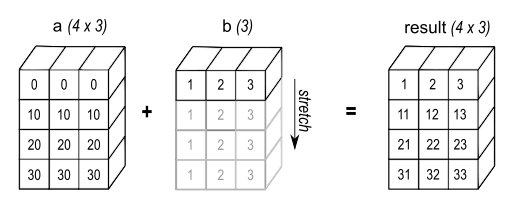

<code>
A     (3d): 256 x 256 x 3
B     (1d):             3
Wynik (3d): 256 x 256 x 3
</code>

<code>
A     (4d): 8 x 1 x 6 x 1
B     (3d):     7 x 1 x 5
Wynik (4d): 8 x 7 x 6 x 5
</code>



W poprzednim przykładzie mieliśmy następującą sytuację:

<code>
a (2d): 4 x 3
b (1d): 1 x 4  
</code>

Widzimy, że rozmiary wymiaru pierwszego od prawej strony nie są kompatybilne. Ale to już zadziała:

In [76]:
a.T * b 

array([[  1.,  22.,  63., 124.],
       [  2.,  24.,  66., 128.],
       [  3.,  26.,  69., 132.]])

Więcej o mechanizmie broadcastingu można poczytać np. [tutaj](https://numpy.org/doc/stable/user/basics.broadcasting.html#basics-broadcasting).

Wróćmy jeszcze do przykładu mnożenia dwóch tablic o tych samych wymiarach:

In [77]:
a = np.array([[1, 2, 3],
              [4, 5, 6]])
b = np.array([[4, 3, 9],
              [5, 2, 1]])
print(a * b)

[[ 4  6 27]
 [20 10  6]]


Zadziałał tutaj mechanizm "wektoryzacji": nie wymnażaliśmy odpowiednich elementów obu tablic za pomocą pętli w Pythonie tylko pozostawiliśmy to bibliotece NumPy, gdzie iteracja po odpowiadających sobie elementach tablic jest realizowana w C, zamiast w interpreterze Pythona. Jest to dużo bardziej efektywne!

Inny przykład - podnoszenie do kwadratu każdego elementu w tablicy:

In [78]:
M**np.array([2])

array([[  1,   4,   9,  16,  25],
       [ 36,  49,  64,  81, 100]])

Albo prościej tak:

In [79]:
M**2

array([[  1,   4,   9,  16,  25],
       [ 36,  49,  64,  81, 100]])

A teraz jeszcze jeden przykład łączący broadcasting i wektoryzację:

In [80]:
M - np.array([5]) > np.array([0])

array([[False, False, False, False, False],
       [ True,  True,  True,  True,  True]])

Albo prościej tak:

In [81]:
M - 5 > 0

array([[False, False, False, False, False],
       [ True,  True,  True,  True,  True]])

## Funkcje matematyczne

NumPy zawiera realizacje podstawowych funkcji matematycznych, takich jak sin, cos, exp, log. Pozwalają one dokonywać odpowiednich operacji na danych tablicowych element po elemencie.

In [82]:
X = np.arange(0, 2 * np.pi, 0.1)

np.sin(X) + np.cos(X)

array([ 1.        ,  1.09483758,  1.17873591,  1.2508567 ,  1.31047934,
        1.3570081 ,  1.38997809,  1.40905987,  1.4140628 ,  1.40493688,
        1.38177329,  1.34480348,  1.29439684,  1.23105701,  1.15541687,
        1.06823219,  0.97037408,  0.86282032,  0.74664554,  0.62301052,
        0.49315059,  0.35836326,  0.21999529,  0.07942919, -0.06193053,
       -0.20267147, -0.34138738, -0.47669226, -0.60723419, -0.73170884,
       -0.84887249, -0.95755449, -1.05666892, -1.14522546, -1.22233929,
       -1.28723991, -1.33927886, -1.37793617, -1.4028256 , -1.41369846,
       -1.41044612, -1.39310106, -1.36183659, -1.31696511, -1.25893494,
       -1.18832592, -1.10584353, -1.01231192, -0.90866563, -0.79594024,
       -0.67526209, -0.54783694, -0.41493798, -0.27789311, -0.13807161,
        0.00312945,  0.14429924,  0.28402724,  0.42091734,  0.55360177,
        0.68075479,  0.80110593,  0.91345269])

Sprawdzimy jedynkę trygonometryczną, czyli tożsamość trygonometryczną postaci

$$\sin^2(\alpha) + \cos^2(\alpha) = 1$$

In [83]:
np.sin(X)**2 + np.cos(X)**2

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [84]:
M.max()

10

Albo tak:

In [85]:
np.max(M)

10

Inne przykłady funkcji matematycznych:

In [86]:
M.min()

1

In [87]:
M.mean()

5.5

In [88]:
M.std()

2.8722813232690143

In [89]:
M.sum()

55

Funkcje takie jak max, min działają szybko, gdyż korzystają z wektorowej architektury procesora. Takie wektorowe funkcje w NumPy nazywają się [ufunc](https://numpy.org/doc/stable/reference/generated/numpy.frompyfunc.html) (ang. *universal functions*).

Teraz spróbujmy czegoś bardziej złożonego. Za pomocą broadcasting'u i wektoryzacji możemy na przykład szybko policzyć przewidywania modelu regresji logistycznej dla różnych danych wejściowych. Bez zbytniego zagłębiania się w szczegóły, model regresji logistycznej jest postaci

$$y(\mathbf{x}) = \frac{1}{1+e^{-(\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n)}}$$,

gdzie $\beta_i$ dla $i = 0,1,\ldots,n$ to parametry modelu (zwykle są "uczone", ale to zagadnienie na inny przedmiot; u nas będą zadane), $\mathbf{x} = [x_1, x_2, \ldots, x_n]$ to wektory obserwacji, tj. zaobserwowanych wartości dla zmiennych niezależnych (zwanych też cechami) $x_j$ dla $j = 1,2,\ldots,n$. Wynikiem jest liczba z przedziału $(0,1)$ interpretowana jako prawdopodobieństwo przynależności do jednej wybranej klasy z dwóch możliwych (regresja logistyczna ma zastosowanie w problemach klasyfikacji binarnej; więcej informacji można znaleźć np. [tutaj](https://pl.wikipedia.org/wiki/Regresja_logistyczna)). 

Zobaczmy jak to działa w przypadku n = 2 i zbioru danych wielkości 5:

In [90]:
# Wartości parametrów modelu regresji logistycznej
beta = [0.07,0.34]
beta0 = 0.04

# Tablica z danymi: wiersze zawierają poszczególne wektory obserwacji, a kolumny zawierają wartości dla
# zmiennych niezależnych x_1 i x_2. 
x = np.array([[0.1,0.4],
              [4.2,5.9],
              [7.2,8.1],
              [7.3,1.1],
              [2.3,0.1]]
            )
print(f"Liczba zmiennych wejściowych: {x.shape[0]}, liczba obserwacji: {x.shape[1]}")

y = 1/(1 + np.exp( -(x.dot(beta)+beta0) ))
y

Liczba zmiennych wejściowych: 5, liczba obserwacji: 2


array([0.54562275, 0.91213609, 0.96436014, 0.71605979, 0.55848111])

I na tym przykładzie (choć dla "nieco" większego zbioru danych) możemy zaobserwować jak korzystanie z biblioteki NumPy pozwala przyspieszyć obliczenia:

**Uwaga:** Obliczenia mogą zająć dłuższą chwilę (ok. 3 min.)!

In [88]:
from timeit import timeit

dataset_size = 100000
number_of_executions = 100

x = np.random.standard_normal((dataset_size,2))
print(f"Liczba zmiennych wejściowych: {x.shape[0]}, liczba obserwacji: {x.shape[1]}")

# Korzystamy z wektoryzacji i iloczynu skalarnego w NumPy
def logreg_vect():
    return 1/(1 + np.exp( -(x.dot(beta)+beta0) ))

# timeit w Jupyterze
#t_vect= %timeit -o logreg_vect()

t_vect = timeit("logreg_vect()", globals=globals(), number=number_of_executions)
print(f'Czas obliczeń z wykorzystaniem broadcasting\'u i wektoryzacji: {t_vect}s')

def logreg_loop():
    # Iterujemy po obserwacjach (wierszach tabeli x) za pomocą pętli for
    y_loop = np.zeros(dataset_size) # Alokacja tablicy na wyniki
    for i in range(dataset_size):
        y_loop[i] = 1/(1 + np.exp( -(x[i,:].dot(beta)+beta0) ))
  
    return y_loop

t_loop = timeit("logreg_loop()", globals=globals(), number=number_of_executions)
print(f'Czas obliczeń za pomocą pętli for w Pythonie: {t_loop}s')
print(f"Broadcasting i wektoryzacja dały nam {t_loop/t_vect:.3f}-krotne przyspieszenie w stosunku do pętli for!")

# Korzystamy z list comprehension
def logreg_lc():
    return [1/(1 + np.exp( -(x[i,:].dot(beta)+beta0) )) for i in range(dataset_size)]

t_lc = timeit("logreg_lc()", globals=globals(), number=number_of_executions)
print(f'Czas obliczeń za pomocą list comprehension: {t_lc}s')
print(f"Broadcasting i wektoryzacja dały nam {t_lc/t_vect:.3f}-krotne przyspieszenie w stosunku do list comprehension!")

Liczba zmiennych wejściowych: 100000, liczba obserwacji: 2
Czas obliczeń z wykorzystaniem broadcasting'u i wektoryzacji: 0.15392950002569705s
Czas obliczeń za pomocą pętli for w Pythonie: 21.3575197000755s
Broadcasting i wektoryzacja dały nam 138.749-krotne przyspieszenie w stosunku do pętli for!
Czas obliczeń za pomocą list comprehension: 23.667572399950586s
Broadcasting i wektoryzacja dały nam 153.756-krotne przyspieszenie w stosunku do list comprehension!


Aby przekształcić algorytmy do ich wektorowej wersji, należy zadbać, aby definiowane przez nas funkcje dobrze pracowały z argumentami typu array. Pokażemy to na przykładzie. Zdefiniujmy funkcję skokową Heaviside'a: 

In [89]:
def heaviside(x):
    if x >= 0:
        return 1
    else:
        return 0

Tak zdefiniowana funkcja nie radzi sobie z argumentem typu `np.array`:

In [90]:
heaviside(np.array([-1,2,-3,5,7]))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

Możemy to naprawić, wykorzystując do tego celu funkcję [numpy.vectorize](https://numpy.org/doc/stable/reference/generated/numpy.vectorize.html), która w większości przypadków automatycznie zwektoryzuje naszą funkcję:

In [ ]:
heaviside_vec = np.vectorize(heaviside)

heaviside_vec(np.array([-1,2,-3,5,7]))

lub używając @np.vectorize jako adnotacji do definiowanej funkcji:

In [ ]:
@np.vectorize
def heaviside(x):
    if x >= 0:
        return 1
    else:
        return 0

heaviside(np.array([-1,2,-3,5,7]))

Można to też zrobić "ręcznie" - wymaga więcej pracy, ale za to możemy uzyskać lepszą wydajność niż stosując wektoryzację automatyczną:

In [ ]:
def heaviside_vec2(x):
    return 1 * (x >= 0)

heaviside_vec2(np.array([-1,2,-3,5,7]))

## Ćwiczenie 2

Proszę "ręcznie" zwektoryzować poniższy kod:

<code>
def test_equality(x):
    if x**2 + 2*x-1 == (x + 2)*x-1:
        return True
    else:
        return False
</code>

<code>
test_equality(np.linspace(0,1,1000))
</code>

In [91]:
# Rozwiązanie
def test_equality(x):
    if x**2 + 2*x-1 == (x + 2)*x-1:
        return True
    else:
        return False

# test_equality(np.linspace(0,1,1000))

def test_equality_2(x):
    return 1 * (x**2 + 2*x-1 == (x + 2)*x - 1)


test_equality_2(np.linspace(0,1,1000))

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,

Poza pewnymi dodatkowymi rzeczami, funkcja np.vectorize wywołuje funkcję [np.frompyfunc](https://numpy.org/doc/stable/reference/generated/numpy.frompyfunc.html#numpy-frompyfunc), która dodaje własności wektoryzacji i broadcasting'u. 

Dla zainteresowanych: krótko o różnicach między tymi funkcjami można poczytać na [StackOverflow](https://stackoverflow.com/questions/6768245/difference-between-frompyfunc-and-vectorize-in-numpy).

Omówmy jeszcze jedną kwestię. Załóżmy, że mamy daną funkcję dwóch zmiennych $x$ i $y$, np. 
$$f(x,y) = \frac{\sin{(\sqrt{x^2 + y^2} + 1)}}{\sqrt{x^2 + y^2} + 1}.$$
Chcielibyśmy policzyć wartości tej funkcji na siatce punktów $(x,y)$, gdzie $x,y \in [-8, -7.5, \ldots, 8]$. Będzie to np. przydatne później, przy omawianiu wizualizacji w Pythonie. Możemy to zrealizować korzystając w funkcji [numpy.meshgrid](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html#numpy.meshgrid). Najpierw jednak zobaczmy jak działa ta funkcja:

In [92]:
mg = np.meshgrid([1,2,3],[5,6,7,8])
mg[0]+mg[1]

array([[ 6,  7,  8],
       [ 7,  8,  9],
       [ 8,  9, 10],
       [ 9, 10, 11]])

Zauważmy, że dostaliśmy w wyniku listę dwóch tablic: mg[0] i mg[1] o tych samych wymiarach. Pytanie co to są za tablice?

Widzimy, że wiersze mg[0] są takie same, równe [1,2,3]. W przypadku mg[1] kolumny są takie same równe [5,6,7]. Wypiszmy jeszcze pary odpowiadających sobie elementów z obu tablic: 

In [93]:
for i in range(mg[0].shape[0]):
    for j in range(mg[0].shape[1]):
        print(f"({mg[0][i,j]},{mg[1][i,j]})")    

(1,5)
(2,5)
(3,5)
(1,6)
(2,6)
(3,6)
(1,7)
(2,7)
(3,7)
(1,8)
(2,8)
(3,8)


W wyniku dostaliśmy współrzędne wszystkich punktów naszej siatki! Nasza siatka wygląda tak:

(1,5) --- (2,5) --- (3,5)

(1,6) --- (2,6) --- (3,6)

(1,7) --- (2,7) --- (3,7)

Korzystając z funkcji numpy.meshgrid w elegancki sposób możemy rozwiązać nasze zadanie:

In [94]:
mg = np.meshgrid(np.arange(-8,8.1,0.5),np.arange(-8,8.1,0.5))
F = np.sqrt(mg[0]**2 + mg[1]**2) + 1
F = np.sin(F)/F
F

array([[-0.02030115, -0.04722329, -0.06924469, ..., -0.06924469,
        -0.04722329, -0.02030115],
       [-0.04722329, -0.07056837, -0.08574957, ..., -0.08574957,
        -0.07056837, -0.04722329],
       [-0.06924469, -0.08574957, -0.09132423, ..., -0.09132423,
        -0.08574957, -0.06924469],
       ...,
       [-0.06924469, -0.08574957, -0.09132423, ..., -0.09132423,
        -0.08574957, -0.06924469],
       [-0.04722329, -0.07056837, -0.08574957, ..., -0.08574957,
        -0.07056837, -0.04722329],
       [-0.02030115, -0.04722329, -0.06924469, ..., -0.06924469,
        -0.04722329, -0.02030115]])

A co to za funkcję policzyliśmy? 

Wyrysowanie tej funkcji pomoże nam udzielić na to pytanie odpowiedzi (w niedalekiej przyszłości dokładniej omówimy kwestie związane z wizualizacją w Pythonie, na razie chcemy tylko zobaczyć co się nam policzyło w NumPy). Zwróćmy uwagę jak siatka punktów mg zostanie użyta w naszej wizualizacji:

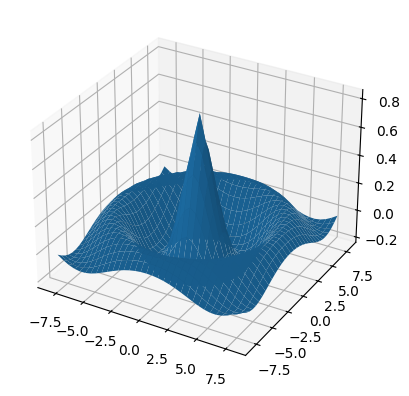

In [95]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(mg[0], mg[1], F)
plt.show()

# Małe zadanie domowe 11

Dane są następujące obserwacje pochodzące z dwóch grup (klas) etykietowanych elementami ze zbioru $\mathcal{G} = \{0,1\}$:

<table>
  <tr>
    <th>A</th>
    <th>B</th>
    <th>Y</th>
  </tr>
  <tr>
    <th>1.0</th>
    <th>1.3</th>
    <th>0</th>
  </tr>
  <tr>
    <th>2.2</th>
    <th>1.1</th>
    <th>1</th>
  </tr>
  <tr>
    <th>2.0</th>
    <th>2.4</th>
    <th>1</th>
  </tr>
  <tr>
    <th>1.5</th>
    <th>3.2</th>
    <th>0</th>
  </tr>
  <tr>
    <th>3.2</th>
    <th>1.2</th>
    <th>1</th>
  </tr>
</table>
    
Kolumny A i B to zmienne niezależne a kolumna Y to zmienna zależna. Wiersze tabeli 

określa etykietę grupy, do której należy dana obserwacja.

Rozważmy następujący model predykcyjny (który próbuje przewidzieć etykietę danego zestawu danych):   

$$M_\mathbf{w}(x_A,x_B) = \frac{1}{1+e^{-(w_0x_A+w_1x_B)}},$$

gdzie $\mathbf{w} = (w_0, w_1)$ to odpowienio wagi dla wartości zmiennych wejściowych $x_A$ i $x_B$.

Proszę napisać program w Pythonie w miarę możliwości wykorzystujący wektoryzację NumPy (tzn. starajmy się jak najmniej korzystać z pętli w Pythonie), który oblicza błąd średniokwadratowy (ang. *Mean Squared Error*) powyższego modelu dla danych obserwacji. Program powinien wyliczać błędy dla wszystkich kombinacji wartości wag, gdzie $w_0 \in [0, 0.1, 0.2, ..., 1]$ oraz $w_1 \in [2, 2.1, 2.2, ..., 3]$. Wynikiem działania programu powinna być tablica 2D z wartościami błędów dla poszczególnych kombinacji wag. 

Błąd średniokwadratowy jest zadany ogólnym wzorem
$$MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat y_i)^2,$$
gdzie $y_i$ to rzeczywiste wartości z danych (z kolumny Y), $\hat y_i$ to wartości przewidywane przez model ($M_\mathbf{w}(x_A,x_B)$), a $n$ to liczba wierszy w tablicy danych (A-B-Y).

Krok 1: Otrzymać 2 tablice na gdzie kolumna odpowiada obserwacji a wiersz odpowiada permutacji współczynników -dla Aw0 i Bw1 (5 kolumn 121 wierszy)
Krok 2: Wyliczyć z wzoru predykcje modelu (5 kolumn 121 wierszy)
Krok 3: Y zmienić tak, żeby było wierszem x 121
Krok 4: Otrzymaną tablice i tablice z kroku 3 wrzucić do wzoru na MSE. To da nam finalną tablicę wynikową.


In [149]:
#Krok 0 - Dane wejściowe
A = np.array([1.0, 2.2, 2.0, 1.5, 3.2])
B = np.array([1.3, 1.1, 2.4, 3.2, 1.2])
Y = np.array([0, 1, 1, 0, 1])

w0 = np.arange(start= 0, stop = 1.1, step = .1)
w1 = np.arange(start= 2, stop = 3.1, step = .1)

W = np.meshgrid(w0, w1) 

#Krok 1

Aw0 = np.meshgrid(W[0].flatten(order = "F"), A)
Aw0 = Aw0[0]*Aw0[1]
Aw0 = Aw0.T

Bw1 = np.meshgrid(W[1].flatten(order = "F"), B)
Bw1 = Bw1[0]*Bw1[1]
Bw1 = Bw1.T
# print("Aw0")
# print(Aw0.shape)
# print("")
# print(Aw0)

# print("Bw1")
# print(Bw1.shape)
# print("")
# print(Bw1)

#Krok 2

y = 1/(1 + np.exp( -(Aw0 + Bw1) ))
# print(y.shape)
# print(y)

#Krok 3

Y_all_rows = np.tile(Y, (121, 1))

#Krok 4

sq_roznica = (y-Y_all_rows)**2
Wynik = np.sum(sq_roznica, axis=1)/5
print(Wynik)

[0.37602458 0.37852564 0.38079628 0.38285294 0.38471142 0.38638693
 0.38789412 0.38924701 0.390459   0.39154275 0.39251017 0.37713954
 0.37962026 0.38185393 0.38386168 0.38566319 0.38727685 0.38871983
 0.39000813 0.3911566  0.39217899 0.39308797 0.37854624 0.38093782
 0.38307887 0.38499316 0.38670242 0.3882266  0.389584   0.39079138
 0.39186408 0.3928161  0.39366016 0.38007569 0.38233936 0.38435757
 0.38615516 0.38775462 0.38917633 0.39043878 0.39155874 0.39255137
 0.39343041 0.39420823 0.38162515 0.38374184 0.38562327 0.38729436
 0.38877745 0.39009263 0.39125799 0.3922898  0.3932027  0.39400984
 0.39472301 0.38313475 0.38509775 0.38683859 0.38838154 0.38974825
 0.39095808 0.39202836 0.39297461 0.3938107  0.39454903 0.3952007
 0.38457153 0.38638165 0.38798407 0.38940202 0.39065612 0.39176475
 0.39274428 0.39360931 0.39437285 0.3950465  0.39564058 0.38591901
 0.38758144 0.38905105 0.3903498  0.39149711 0.39251023 0.3934045
 0.39419352 0.39488941 0.39550292 0.39604361 0.38717062 0.388692

Teraz spróbujmy czegoś bardziej złożonego. Za pomocą broadcasting'u i wektoryzacji możemy na przykład szybko policzyć przewidywania modelu regresji logistycznej dla różnych danych wejściowych. Bez zbytniego zagłębiania się w szczegóły, model regresji logistycznej jest postaci

$$y(\mathbf{x}) = \frac{1}{1+e^{-(\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n)}}$$,

gdzie $\beta_i$ dla $i = 0,1,\ldots,n$ to parametry modelu (zwykle są "uczone", ale to zagadnienie na inny przedmiot; u nas będą zadane), $\mathbf{x} = [x_1, x_2, \ldots, x_n]$ to wektory obserwacji, tj. zaobserwowanych wartości dla zmiennych niezależnych (zwanych też cechami) $x_j$ dla $j = 1,2,\ldots,n$. Wynikiem jest liczba z przedziału $(0,1)$ interpretowana jako prawdopodobieństwo przynależności do jednej wybranej klasy z dwóch możliwych (regresja logistyczna ma zastosowanie w problemach klasyfikacji binarnej; więcej informacji można znaleźć np. [tutaj](https://pl.wikipedia.org/wiki/Regresja_logistyczna)). 

Zobaczmy jak to działa w przypadku n = 2 i zbioru danych wielkości 5:

## Kilka uwag o zapisywaniu i wczytywaniu danych do/z pliku

Utwórzmy plik tekstowy dane.txt zapisując do niego dwuwymiarową tablicę:

In [ ]:
X = np.array([[ 1, 2 ,3],
              [ 4, 5, 6],
              [ 7, 8, 9],
              [10,11,12]])

np.savetxt('dane.txt', X, fmt='%.3e', delimiter=',', newline='\n', header='')

Uwaga: X może być co najwyżej tablicą dwuwymiarową. To nie zadziała:

In [ ]:
np.savetxt('test.txt', X.reshape((2,3,2)), fmt='%.3e', delimiter=',', newline='\n', header='')

Dane z pliku tekstowego możemy wczytać w następujący sposób:

In [ ]:
data = np.loadtxt('dane.txt', delimiter=',')
print(data)

Może się zdarzyć, że w pliku brakuje pewnych wartości:

In [ ]:
with open('dane.txt', 'w') as f:
    f.write('1, 2,  \n')
    f.write('4,  , 6\n')
    f.write('7, 8, 9\n')

Wówczas możemy wczytać dane w następujący sposób:

In [ ]:
np.genfromtxt("dane.txt", delimiter=",")

albo określając wartość dla brakujących danych, w tym przypadku -1:

In [ ]:
np.genfromtxt("dane.txt", delimiter=",", dtype=np.int8, filling_values=-1)

Używając funkcji [numpy.save](https://numpy.org/doc/stable/reference/generated/numpy.save.html#numpy.save) możemy zapisywać tablice NumPy do pliku binarnego w formacie [.npy](https://numpy.org/doc/stable/reference/generated/numpy.lib.format.html#module-numpy.lib.format). Funkcja ta pozwala zapisywać tablice o dowolnych wymiarach:

In [ ]:
t = np.random.standard_normal((4,3,5))

with open('dane.npy', 'wb') as f:
    np.save(f, t, allow_pickle=False)
    np.save(f, np.array([[1,2,5],[6,8,9]]), allow_pickle=False)

Został utworzony plik binarny dane.npy.

Moduł pickle pozwala na serializację i deserializację obiektów Pythona. Serializacja (ang. *pickling*) to proces przekształcania obiektu w ciąg bajtów a deserializacja to proces odwrotny. My jednak opcję allow_pickle ustawiliśmy na False, co jest zalecane ze względów bezpieczeństwa. Przy zapisie problemu nie ma, bo wiemy co zapisujemy. Niestety, nie zawsze wiemy co dokładnie wczytujemy, a wczytywanie danych za pomocą modułu pickle umożliwia wykonanie dowolnego kodu. Dlatego może to być niebezpieczne.

Za pomocą funkcji [numpy.load](https://numpy.org/doc/stable/reference/generated/numpy.load.html) możemy wczytać nasze dane:

In [ ]:
with open('dane.npy', 'rb') as f:
    t1 = np.load(f)
    t2 = np.load(f)

print(t1)
print(t2)

Opcja allow_pickle jest domyślnie ustawiona na False, więc jesteśmy bezpieczni.

Moża też za jednym razem zapisać słownik tablic za pomocą funkcji [numpy.savez](https://numpy.org/doc/stable/reference/generated/numpy.savez.html#numpy.savez) lub [numpy.savez_compressed](https://numpy.org/doc/stable/reference/generated/numpy.savez_compressed.html#numpy.savez_compressed):

In [ ]:
t1 = np.random.standard_normal((4,3,5))
t2 = np.random.standard_normal((4,3))
t3 = np.random.standard_normal((3,5))

table_dict = {'a':t1, 'b':t2, 'c':t3}

#np.savez('tablice.npz', **table_dict)
np.savez_compressed('tablice.npz', **table_dict)

In [ ]:
ts = np.load('tablice.npz')
    
ts.files

In [ ]:
ts['a']